<a href="https://colab.research.google.com/github/emanuel379/Regressao-I/blob/main/Lista_2_Regress%C3%A3o_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

import pandas as pd
from sklearn.linear_model import LinearRegression

**7.** Suponha, como no exercício 5, que nosso problema é modelado por uma equação linear que passa pela origem, i.e. µY|x = β1x. Dito isso,

**(a)** estime a linha de regressao para os seguintes dados:

x 0.5 1.5 3.2 4.2 5.1 6.5

y 1.3 3.4 6.7 8.0 10.0 13.2

Equação da Regressão Linear: Yi = 0.35 + 1.93Xi




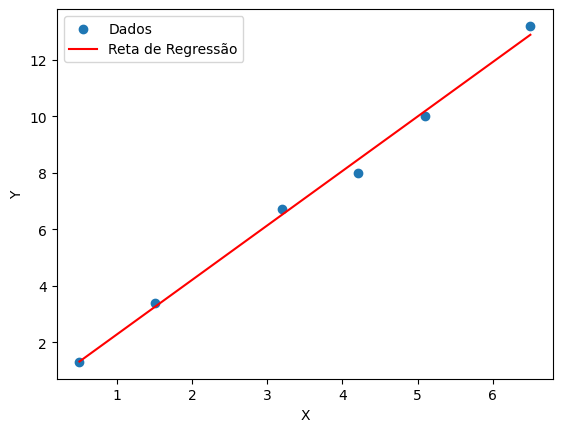

In [ ]:
# Dados
x = [0.5, 1.5, 3.2, 4.2, 5.1, 6.5]
y = [1.3, 3.4, 6.7, 8.0, 10.0, 13.2]

# Obtendo o nosso modelo de Regressão Linear
coefficients = np.polyfit(x, y, 1)  # 1 para especificar que o modelo é linear
slope, intercept = coefficients

# Criando a Regressão Linear
regression_line = np.poly1d(coefficients)

# Printando a equação da Regressão Linear obtida
print(f"Equação da Regressão Linear: Yi = {intercept:.2f} + {slope:.2f}Xi")

print('\n')

# Criando um range  para os valores de X, baseados em X(1) e X(n)
x_range = np.linspace(min(x), max(x), 100)

# Calculando os valores correspondentes de Y no modelo
y_range = regression_line(x_range)

# Plotando os dados originais
plt.scatter(x, y, label='Dados')

# Plotando a reta de rRegressão
plt.plot(x_range, y_range, color='red', label='Reta de Regressão')

# Adicionando labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Plotando o modelo resultante
plt.show()

**(b)** Imagine que nao sabemos se a verdadeira linha de regressão deva passar pela origem ou não. Estime o modelo linear µY|x = β0 + β1x, e teste a hipotese de que β0 = 0, com um nível de 90% de significancia em relação a hipótese alternativa β0 != 0.

In [ ]:
# Adicionando uma constante à variável independente para incluir β0.
x = sm.add_constant(x)

# Ajustando o modelo de regressão linear simples.
model = sm.OLS(y, x).fit()

# Observando resultados importantes.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     953.0
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           6.56e-06
Time:                        22:29:04   Log-Likelihood:               -0.33308
No. Observations:                   6   AIC:                             4.666
Df Residuals:                       4   BIC:                             4.250
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3492      0.253      1.378      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


**8.** Há um certo tipo de molusco, do gênero Haliotis, cuja carne é apreciada por várias culturas, podendo esta ser consumida tanto crua quanto cozida. Um
problema encontrado por cientistas que estudam esse animal é determinar a idade de indivíduos a partir do tamanho de suas conchas. Essa não e uma tarefa simples de realizar, porque o crescimento das conchas não depende apenas do tempo de vida, e sim também da disponibilidade de alimento. Uma abordagem comumente adotada é retirar uma amostra da concha e analisar, com a ajuda de um microscópio, o número de anéis presentes nela. Imagine que você faça parte de um grupo de pesquisa que esteja interessado em utilizar as medidas físicas dos moluscos, especialmente a altura da concha, para prever seus tempos de vida. Acredita-se que um modelo de regressão linear simples com erros normais seja suficiente para descrever a relação entre altura e idade. Em particular, o grupo busca dar suporte a teoria de que conchas maiores correspondem a animais mais velhos. Os dados que utilizaremos neste exercício estão no arquivo molusco.csv. Mais informações sobre essa base podem ser encontradas em https://archive.ics.uci.edu/ml/datasets/Abalone.

**(a)** Escreva algumas sentenças descrevendo o problema da pesquisa e a hipotese científica que será verificada.

**Resposta:**

- Deseja-se verificar a idade dos moluscos.

- Para isso, busca-se uma relação entre a idade dos moluscos e o tamanho de suas conchas.

- Para tal abordagem, temos a hipótese de que, se o tamnho da concha aumentar, isso nos traz evidências de que tais moluscos são mais velhos, o mesmo é válido para o caso contrário, o qual nos traria evidências de que se tratam de moluscos mais jovens.

**(b)** Examine as duas variáveis da base de dados individualmente. Faça um resumo de suas medidas (média, variância, intervalo de amostragem, etc). Faça essa descrição também por meio de gráficos. Qual e a unidade de Height?

In [ ]:
# Observando os dados extraídos

df = pd.read_csv('molusco.csv')
df

,Height,Rings
0,0.095,15
1,0.090,7
2,0.135,9
3,0.125,10
4,0.080,7
...,...,...
4172,0.165,11
4173,0.135,10
4174,0.205,9
4175,0.150,10


In [ ]:
# Encontrando as medidas descritivas para os dados da altura, considerando a unidade "milímetros = mm"

print(f'A média das alturas é de {round(np.mean(df["Height"]), 4)} mm')
print(f'A variância das alturas é de {round(np.var(df["Height"]), 4)} mm^2')
print(f'O intervalo de amostragem das alturas varia de {np.min(df["Height"])} a {np.max(df["Height"])} mm')
print(f'A amplitude observada para as alturas é de {np.max(df["Height"]) - np.min(df["Height"])} mm')

A média das alturas é de 0.1395 mm
A variância das alturas é de 0.0017 mm^2
O intervalo de amostragem das alturas varia de 0.0 a 1.13 mm
A amplitude observada para as alturas é de 1.13 mm


In [ ]:
# Encontrando as medidas descritivas para os dados do número de anéis

print(f'A média do número de anéis é de {round(np.mean(df["Rings"]), 2)} anéis')
print(f'A variância do número de anéis é de {round(np.var(df["Rings"]), 2)} anéis^2')
print(f'O intervalo de amostragem do número de anéis varia de {np.min(df["Rings"])} a {np.max(df["Rings"])} anéis')
print(f'A amplitude observada para o número de anéis é de {np.max(df["Rings"]) - np.min(df["Rings"])} anéis')

A média do número de anéis é de 9.93 anéis
A variância do número de anéis é de 10.39 anéis^2
O intervalo de amostragem do número de anéis varia de 1 a 29 anéis
A amplitude observada para o número de anéis é de 28 anéis


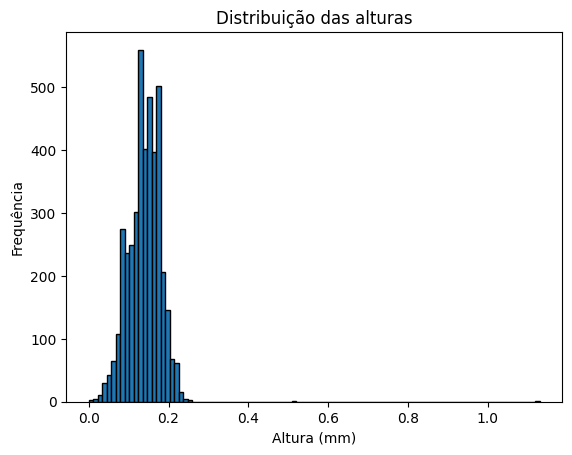

In [ ]:
# Plotando o gráfico de distribuição de frequências das alturas

plt.hist(df['Height'], bins = 100, edgecolor='k')
plt.xlabel('Altura (mm)')
plt.ylabel('Frequência')
plt.title('Distribuição das alturas')
plt.show()

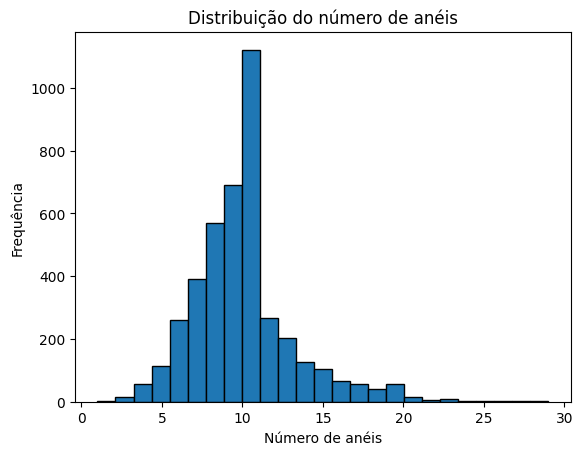

In [ ]:
# Plotando o gráfico de distribuição de frequências do número de anéis

plt.hist(df['Rings'], bins = 25, edgecolor='k')
plt.xlabel('Número de anéis')
plt.ylabel('Frequência')
plt.title('Distribuição do número de anéis')
plt.show()

**(c)** Faça um gráfico de dispersão dos dados. Descreva as tendências interessantes observadas.

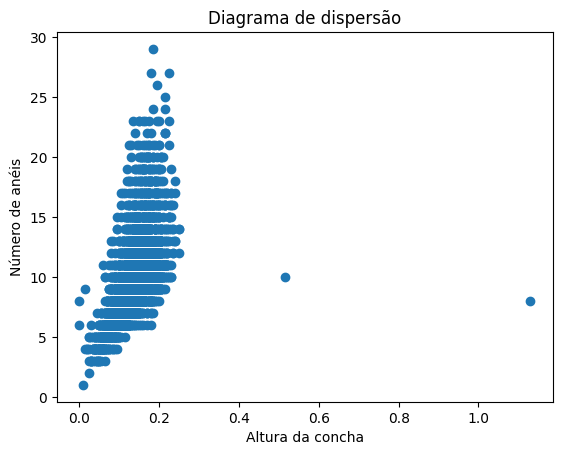

In [ ]:
# Plotando o diagrama de dispersão para os dados

plt.scatter(df['Height'], df['Rings'])
plt.xlabel('Altura da concha')
plt.ylabel('Número de anéis')
plt.title('Diagrama de dispersão')
plt.show()

Não é possível observar uma relação tão clara entre os dados, entretanto é possível perceber que existe uma correlação positiva entre a altura da concha e o número de anéis.

**(d)** Ajuste uma linha de regressão aos dados, prevendo o número de anéis na concha utilizando o tempo de vida dos moluscos.

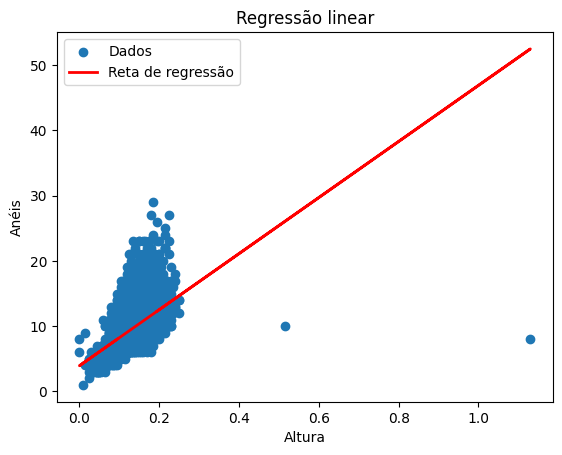

In [ ]:
X = df['Height'].values.reshape(-1, 1)
y = df['Rings'].values

# Criando e ajustando um modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Fazendo predições utilizando o modelo
y_pred = model.predict(X)

# Criando o diagrama de dispersão
plt.scatter(X, y, label='Dados')

# Plotando a reta de regressão
plt.plot(X, y_pred, color='red', linewidth=2, label= f'Reta de regressão')

plt.xlabel('Altura')
plt.ylabel('Anéis')
plt.title('Regressão linear')
plt.legend()
plt.show()

**(e)** Crie um grafico de dispersão que mostre os dados e a função de regressão estimada (você pode incluir no grafico anterior). Descreva o ajuste da reta.

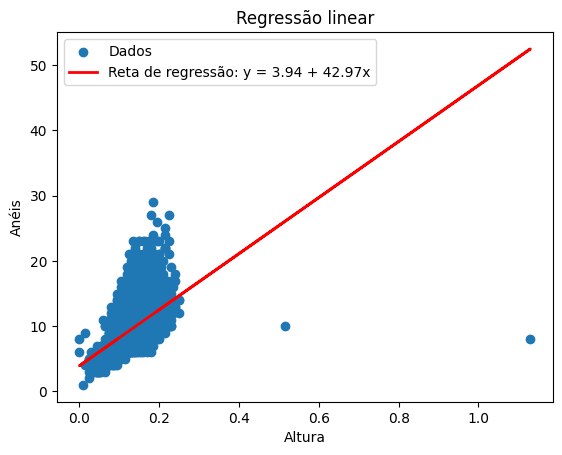

In [ ]:
X = df['Height'].values.reshape(-1, 1)
y = df['Rings'].values

# Criando e ajustando um modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Fazendo predições utilizando o modelo
y_pred = model.predict(X)

# Extraindo o intercepto e o coeficiente angular
slope = model.coef_[0]
intercept = model.intercept_

# Criando o diagrama de dispersão
plt.scatter(X, y, label='Dados')

# Plotando a reta de regressão
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Reta de regressão: y = {intercept:.2f} + {slope:.2f}x')

plt.xlabel('Altura')
plt.ylabel('Anéis')
plt.title('Regressão linear')
plt.legend()
plt.show()

É possível observar que o ajuste da reta aos dados não foi muito bom, uma vez que a presença de pontos extremos e a aglomeração de vários dados para uma determinada altura, porém com resultados distintos para o número real de anéis, não nos permite observar com clareza o comportamento dos dados através de um modelo linear, embora seja aparente a observação de uma correlação positiva entre a altura da concha e o número de anéis. Tal situação poderia nos indicar a necessidade de reavaliação do modelo, considerando-se mais variáveis preditoras ou mesmo que o modelo seja não linear.

**(f)** Forneça um intervalo de 95% de confiança para β0 e β1. Interprete no contexto do problema.

In [ ]:
X = df['Height']
y = df['Rings']

# Adicionando uma constante ao valor de β0.
X = sm.add_constant(X)

# Criando e ajustando um modelo OLS.
model = sm.OLS(y, X).fit()

# Obtendo intervalos de 95% de confiança para β0 e β1.
confidence_intervals = model.conf_int(alpha=0.05)

# Extraindo os valores.
intercept_ci = confidence_intervals.loc['const'].values
beta1_ci = confidence_intervals.loc['Height'].values

# Arredondando para três casas decimais.
intercept_ci = [round(val, 3) for val in intercept_ci]
beta1_ci = [round(val, 3) for val in beta1_ci]

# Printando os intervalos de confiança.
print(f'Intervalo de confiança de 95% para β0: {intercept_ci}')
print(f'Intervalo de confiança de 95% para β1: {beta1_ci}')

Intervalo de confiança de 95% para β0: [3.656, 4.221]
Intervalo de confiança de 95% para β1: [41.03, 44.913]


É possível observar, com base no intervalo de confiança de 95%, que o intercepto não é uma medida desprezivel, ou seja β0 != 0, também é possível analizar que, para cada milímetro de altura a mais na concha, é esperado um incremento aproximado de 41 a 45 anéis para o molusco, os quais refletem diretamente em seu tempo de vida.

**(g)** Há uma relação estatÍstica significante entre altura e número de anéis (e, portanto, tempo de vida) dos moluscos?

**Resposta:**

Sim, uma vez que se espera um incremento de até 45 anos na expectativa de vida de um molusco, caso sua concha aumente em um milímetro, situação que no entando difícilmente ocorreria, dada a amostra observada, entretanto não é permitida uma interpretação conclusiva do modelo, devido a, entre outros fatores, presença de outliers, baixa complexidade e possível não linearidade.

**(h)** Faça uma estimativa pontual e encontre o intervalo de 95% de confiança para o numero médio de anéis de moluscos com altura 0.128 (na mesma unidade das outras observações).

In [ ]:
# Encontrando uma estimativa pontual para Yi.
Yi = intercept + slope*0.128

print(f'Uma estimativa pontual para Yi através do modelo foi de {Yi:.2f}')

Uma estimativa pontual para Yi através do modelo foi de 9.44


In [ ]:
# Valor de um Xi.
X_value = 0.128

# Acessando os conjuntos de dados para X e y.
X = df['Height']
y = df['Rings']

# Adicionando uma constante ao valor de β0.
X = sm.add_constant(X)

# Criando e ajustando um modelo OLS.
model = sm.OLS(y, X).fit()

# Criando um novo dado com o valor de Xi
X_specific = [1, X_value]

# Obtendo o intervalo de predição para um valor específico de Xi.
prediction = model.get_prediction(exog = X_specific)

# Encontrando os limites superior e inferior do nosso intervalo de confiança.
lim_inf = round(prediction.conf_int(alpha=0.05)[0, 0], 3)
lim_sup = round(prediction.conf_int(alpha=0.05)[0, 1], 3)

# Observando o resultado.
print(f'Intervalo de confiança de 95% para Y quando x = 0.128mm: [{lim_inf}, {lim_sup}]')

Intervalo de confiança de 95% para Y quando x = 0.128mm: [9.355, 9.523]


**(i)** Estamos interessados agora em predizer o numero de anéis de um molusco de tamanho 0.132 (mesma unidade que as anteriores). Encontre o valor predito e o intervalo de prediçao com 99% de significância.

In [ ]:
# Encontrando uma estimativa pontual para Yi.
Yi = intercept + slope*0.132

print(f'Uma estimativa pontual para Yi através do modelo foi de {Yi:.2f}')

Uma estimativa pontual para Yi através do modelo foi de 9.61


In [ ]:
# Valor de um Xi.
X_value = 0.132

# Acessando os conjuntos de dados para X e y.
X = df['Height']
y = df['Rings']

# Adicionando uma constante ao valor de β0.
X = sm.add_constant(X)

# Criando e ajustando um modelo OLS.
model = sm.OLS(y, X).fit()

# Criando um novo dado com o valor de Xi
X_specific = [1, X_value]

# Obtendo um sumário com o intervalo de predição para um Xi específico.
summary_frame = model.get_prediction(exog=X_specific).summary_frame(alpha=0.01)

# Encontrando os limites superior e inferior do intervalo de predição.
lower_bound = round(summary_frame['obs_ci_lower'][0], 3)
upper_bound = round(summary_frame['obs_ci_upper'][0], 3)

# Observando o resultado.
print(f'99% Prediction Interval for Y when X = {X_value}: [{lower_bound}, {upper_bound}]')

99% Prediction Interval for Y when X = 0.132: [2.711, 16.51]


**(j)** Conclua brevemente o estudo.

**Resposta:**

O estudo visa obter uma relação entre a altura da concha e a idade do molusco, entretanto, apesar de ser possível a observação de uma correlação positiva entre as duas variáveis, observamos que o modelo linear simples não é o mais adequado, o que indica a necessidade de se acrescentar novas variáveis de interesse para a predição da idade dos moluscos( como peso, sexo, diâmetro, etc.) ou mesmo a possibilidade de que não se trate de um modelo linear, o que nos levaria a outros tipos de análises que se adequem melhor à correlação pretendida.